In [8]:
%pip install git+https://github.com/ytdl-org/youtube-dl

  Cloning https://github.com/ytdl-org/youtube-dl to /private/var/folders/8v/d886z5j13dsctyjpw29t7y480000gn/T/pip-req-build-_981330i
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl /private/var/folders/8v/d886z5j13dsctyjpw29t7y480000gn/T/pip-req-build-_981330i
  Resolved https://github.com/ytdl-org/youtube-dl to commit a08f2b7e4567cdc50c0614ee0a4ffdff49b8b6e6
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [43]:
%%bash
# check the right python is being used (same as kernel python)
which python
which youtube-dl
mkdir -p sample_videos
cd sample_videos
which youtube-dl
youtube-dl 'https://www.youtube.com/watch?v=YwWtDSponlc&ab_channel=CNBCTelevision'
youtube-dl 'https://www.youtube.com/watch?v=L9Tyb_ycRfU&ab_channel=CNBCTelevision'
youtube-dl 'https://www.youtube.com/watch?v=0wJqgHSfYi0&ab_channel=CNBCTelevision'

/Users/orm/mambaforge/envs/pixeltable_39/bin/youtube-dl
[youtube] 0wJqgHSfYi0: Downloading webpage
[download] Snowflake CEO joins Jim Cramer after earnings report drives stock higher-0wJqgHSfYi0.mp4 has already been downloaded and merged


In [55]:
import pathlib
import pixeltable as pxt

In [56]:
#pxt.rm_dir('transcription_demo', force=Trie) # really want this?
pxt.create_dir('transcription_demo', ignore_errors=True)

In [57]:
pxt.drop_table('transcription_demo.sentence_view', ignore_errors=True)
pxt.drop_table('transcription_demo.video_table', ignore_errors=True)
video_table = pxt.create_table('transcription_demo.video_table', {'video': pxt.VideoType()},)
#video_table = pxt.get_table('transcription_demo.video_table')

Created table `video_table`.


In [58]:
# can we insert relative paths? have them be resolved, or accept pathlib.Paths?
paths = [str(pathlib.Path(p).absolute()) for p in pathlib.Path('./sample_videos/').iterdir()]
video_table.insert([{'video': video_path} for video_path in paths[:2] ])

Inserting rows into `video_table`: 2 rows [00:00, 1894.02 rows/s]
Inserted 2 rows with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [59]:
import importlib

In [61]:
import pixeltable.functions.video
from pixeltable.functions.video import get_metadata

In [62]:
from pixeltable.functions.video import extract_audio
from pixeltable.functions import openai

In [63]:
video_table.add_column(audio=extract_audio(video_table.video, format='mp3'))

Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:07<00:00,  3.92s/ cells]
Added 2 column values with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

video,audio
,
,

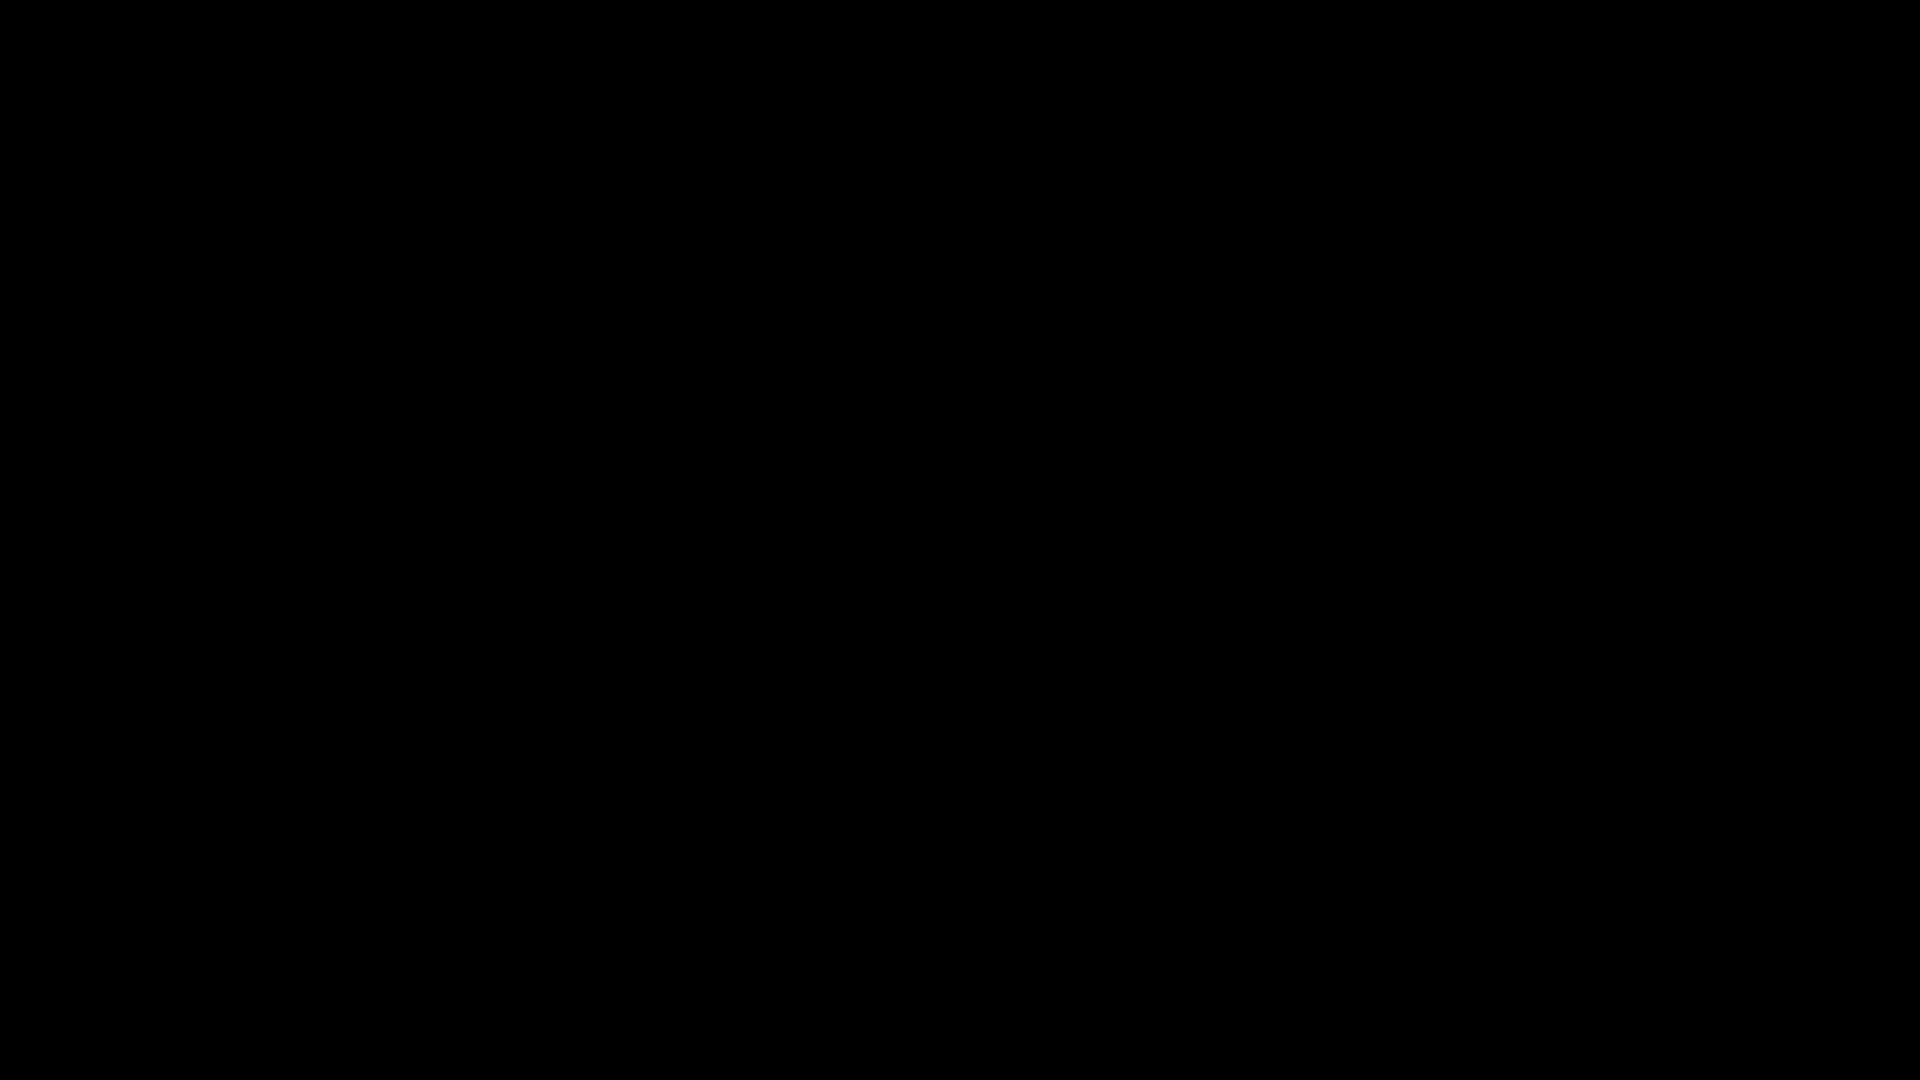
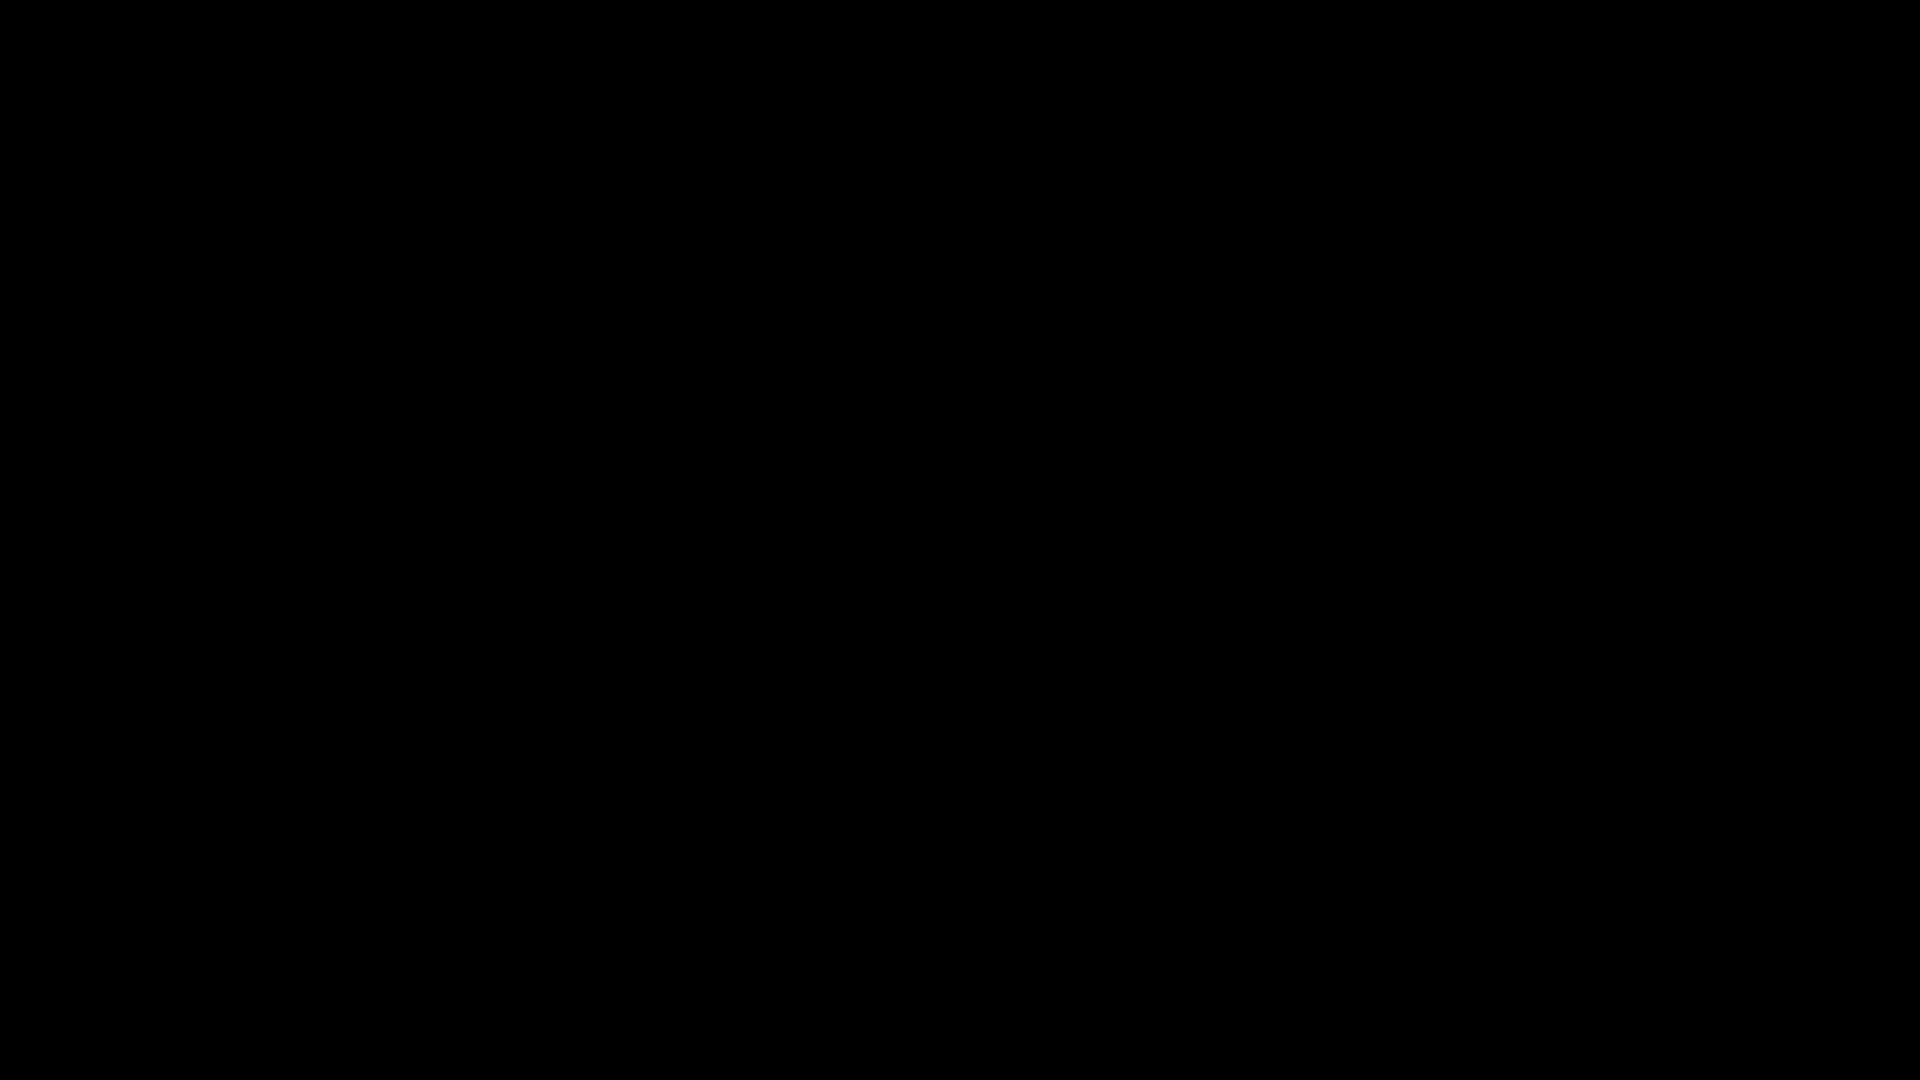

In [64]:
video_table.show()

In [65]:
video_table.add_column(audio_meta=get_metadata(video_table.audio))

Computing cells: 100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 309.84 cells/s]
Added 2 column values with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

video,audio,audio_meta
,,"{'size': 8266796, 'streams': [{'type': 'audio', 'frames': 0, 'duration': 7290936576, 'metadata': {'encoder': 'Lavf'}, 'time_base': '1/14112000', 'codec_context': {'name': 'mp3float', 'profile': None, 'channels': 2, 'codec_tag': '\\x00\\x00\\x00\\x00'}, 'duration_seconds': 516.648}], 'bit_rate': 128006, 'metadata': {'encoder': 'Lavf60.3.100'}, 'bit_exact': False}"
,,"{'size': 9245228, 'streams': [{'type': 'audio', 'frames': 0, 'duration': 8153913600, 'metadata': {'encoder': 'Lavf'}, 'time_base': '1/14112000', 'codec_context': {'name': 'mp3float', 'profile': None, 'channels': 2, 'codec_tag': '\\x00\\x00\\x00\\x00'}, 'duration_seconds': 577.8}], 'bit_rate': 128005, 'metadata': {'encoder': 'Lavf60.3.100'}, 'bit_exact': False}"

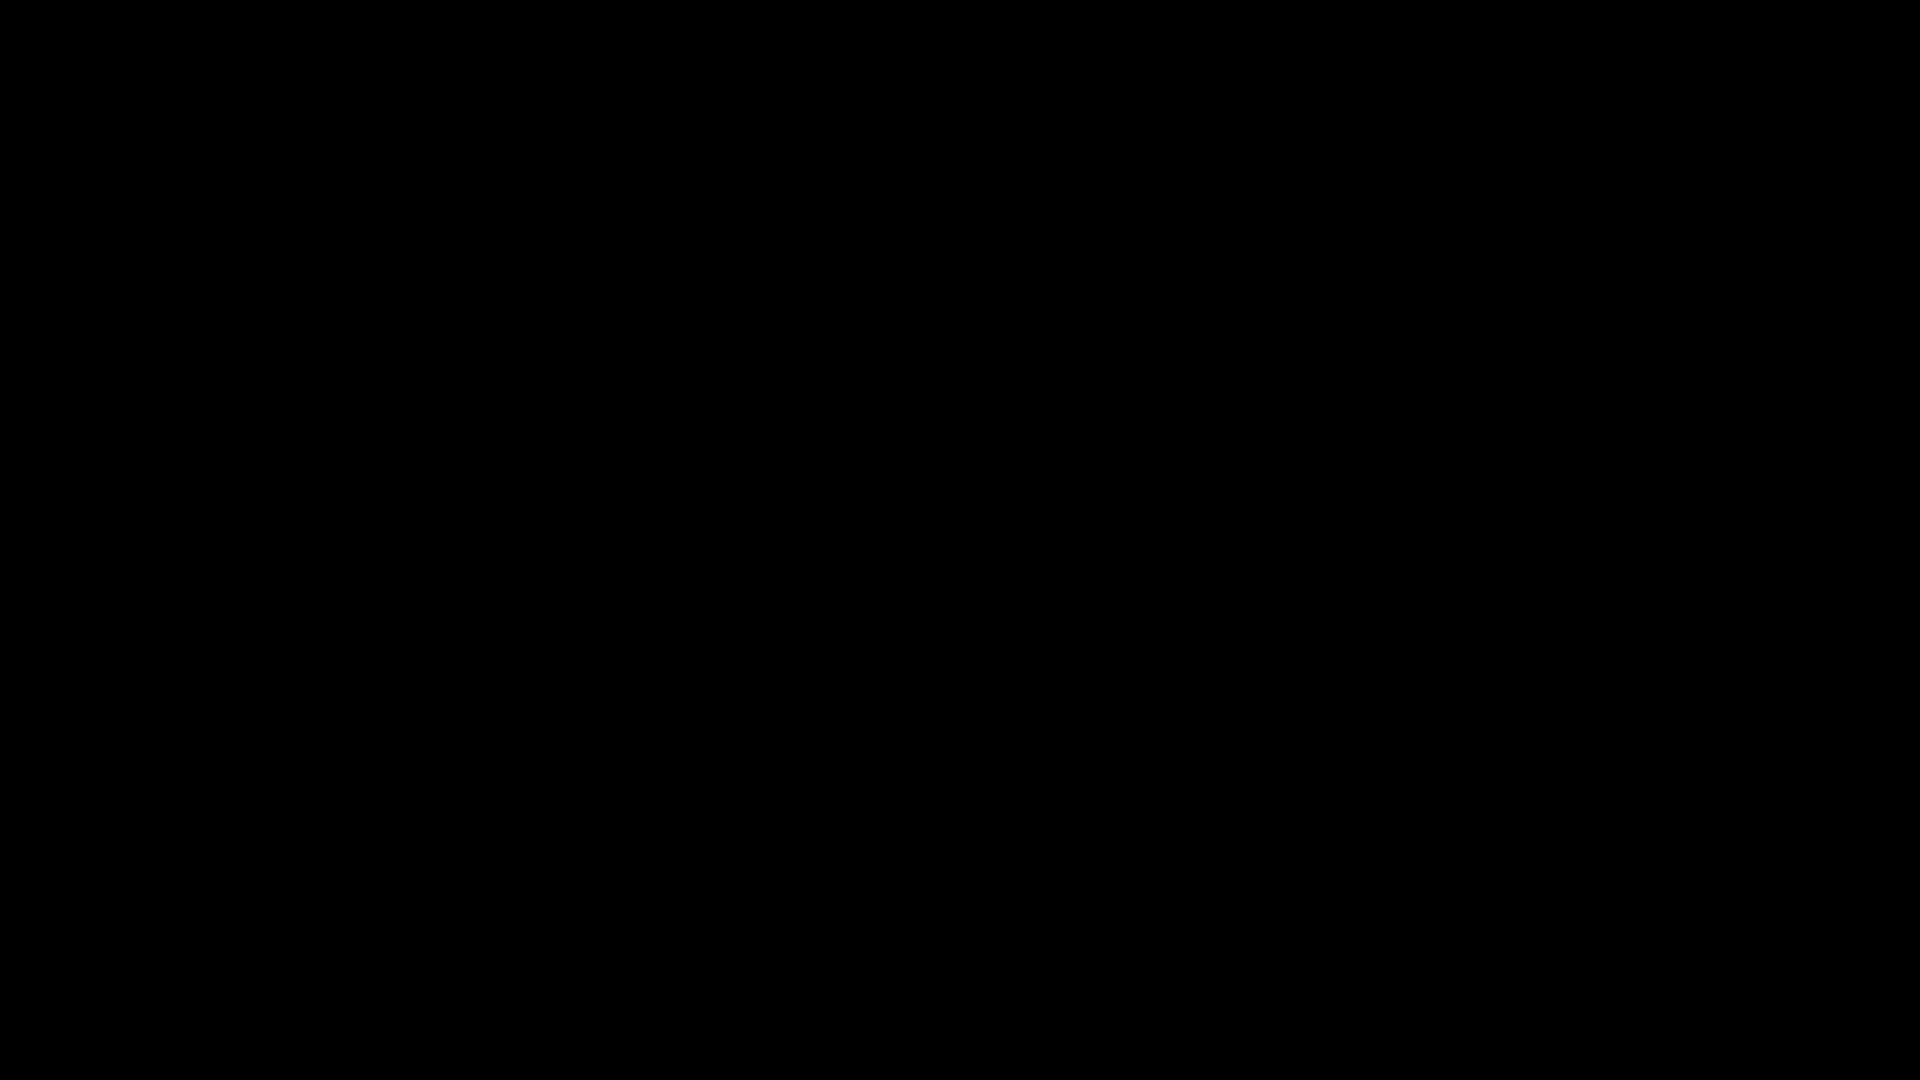
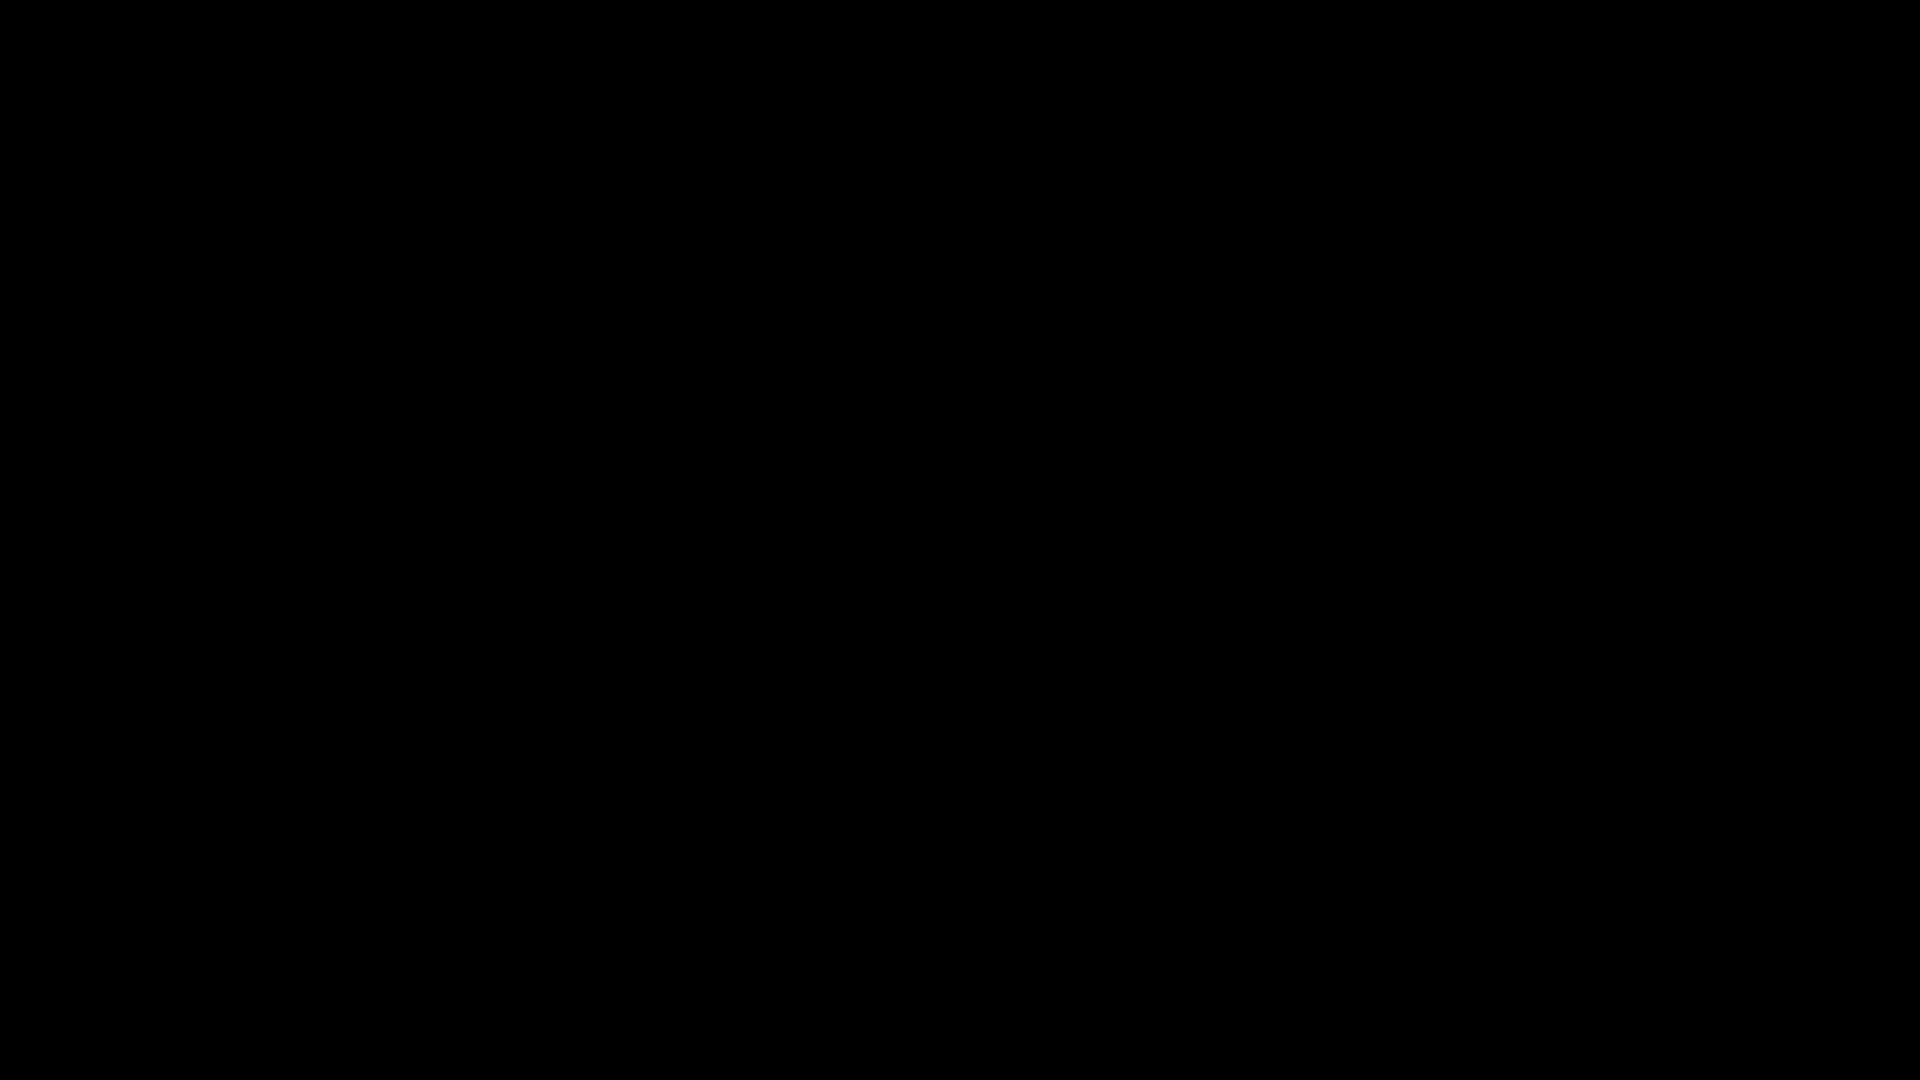

In [66]:
video_table.show()

In [70]:
# the downloaded video and audio does not allow random access. but there are operations to fix this.

In [40]:
#open ai api does not use the keyword audio, it uses the keyword file. it helps being consistent with their docs.
#https://platform.openai.com/docs/guides/speech-to-text/quickstart?lang=python
# File uploads are currently limited to 25 MB and the following input file types are supported: mp3, mp4, mpeg, mpga, m4a, wav, and webm.

In [61]:
## error size
 # 1.  file size is too large in bytes (this MAY BE influenced by our using WAV to extract from the video, as opposed to a compressed format?)
 # 2. this exception should surface for that row, without stopping the entire process, as there are other files in the table.
# Error: In row 0 the expression transcriptions(audio, model='whisper-1') encountered exception APIStatusError:
# Error code: 413 - {'error': {'message': 'Maximum content size limit (26214400A) exceeded (26296746 bytes read)', 'type': 'server_error', 'param': None, 'code': None}

In [73]:
# video_table.select().show()

In [67]:
video_table.add_column(transcription=openai.transcriptions(audio=video_table.audio, model='whisper-1'))

Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:52<00:00, 26.31s/ cells]
Added 2 column values with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

video  \
0  /Users/orm/repos/pixeltable/docs/drafts/whispe...   
1  /Users/orm/repos/pixeltable/docs/drafts/whispe...   

                                               audio  \
0  /Users/orm/.pixeltable/media/c44ae0ad4c274c9cb...   
1  /Users/orm/.pixeltable/media/c44ae0ad4c274c9cb...   

                                          audio_meta  \
0  {'size': 8266796, 'streams': [{'type': 'audio'...   
1  {'size': 9245228, 'streams': [{'type': 'audio'...   

                                       transcription  
0  {'text': 'The Snowflake back on track after a ...  
1  {'text': 'My mission is simple. To make you mo...
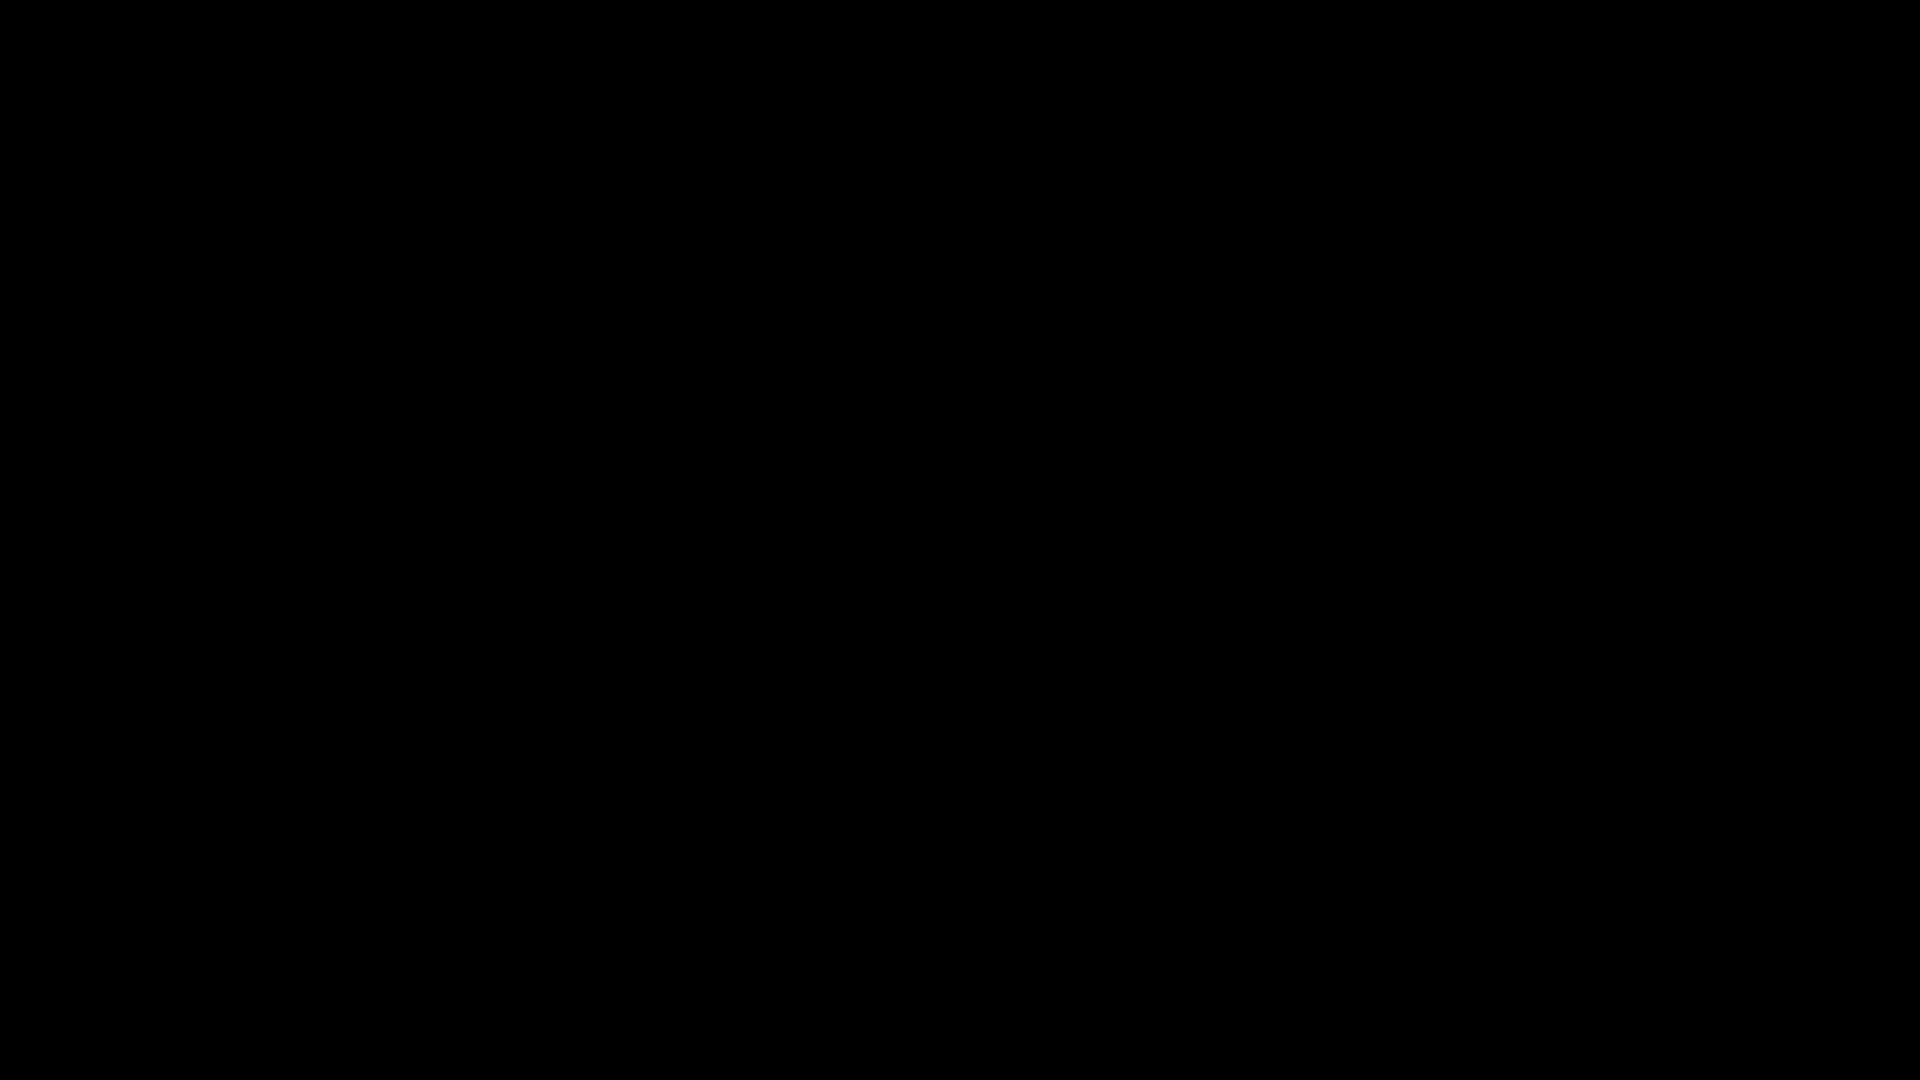
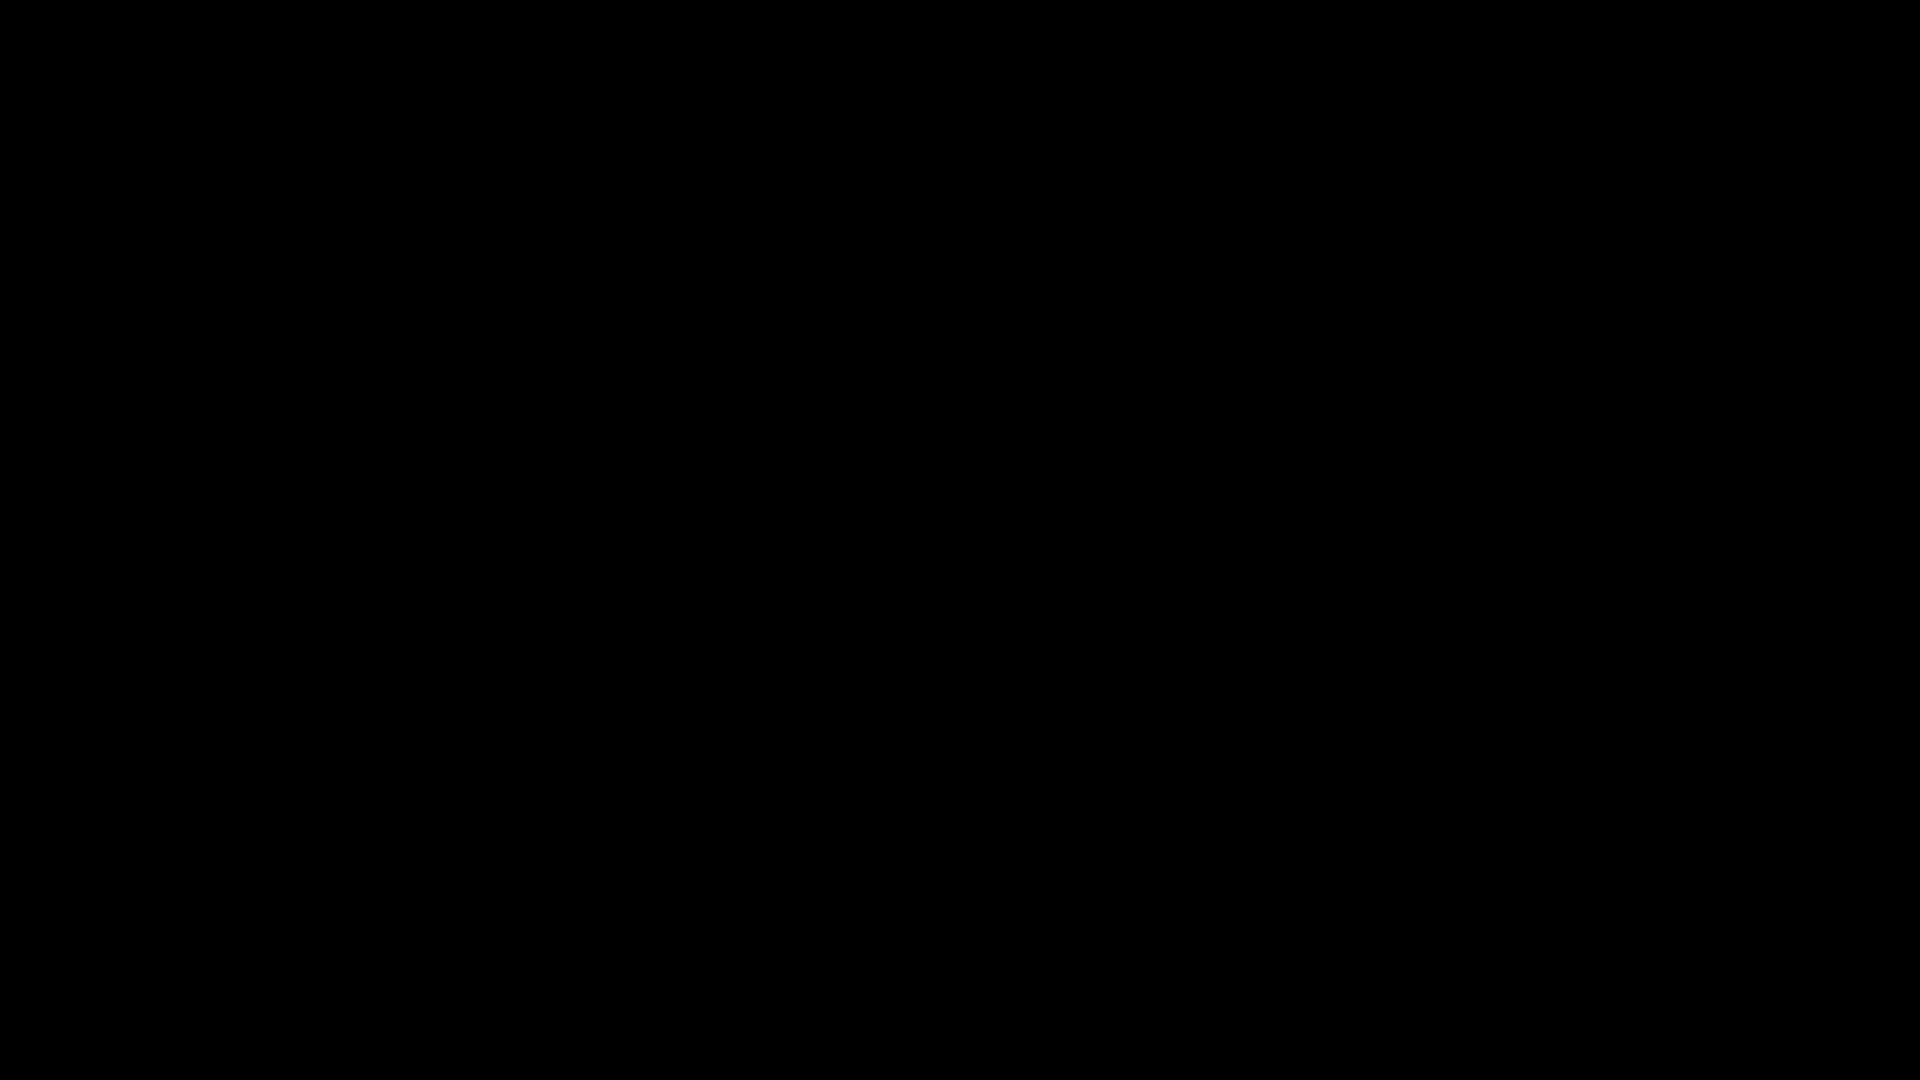

In [68]:
video_table.show()

In [69]:
@pxt.udf
def get_text(transcription: dict) -> str:
    return transcription['text']
video_table.add_column(transcription_text=get_text(video_table.transcription))

Computing cells: 100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 697.08 cells/s]
Added 2 column values with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [70]:
import importlib
import embeddings
importlib.reload(embeddings)
from embeddings import SentenceSplitter


In [71]:
sentence_view = pxt.create_view('transcription_demo.sentence_view', video_table, iterator=SentenceSplitter.create(text=video_table.transcription_text))

Inserting rows into `sentence_view`: 320 rows [00:00, 24933.63 rows/s]
Created view `sentence_view` with 320 rows, 0 exceptions.


In [77]:
sentence_view.select(sentence_view.pos, sentence_view.text).where(sentence_view.pos <= 10).show()

pos,text
0,The Snowflake back on track after a couple of months in the wilderness.
1,The last time we heard from this enterprise software data analytics companies back in February they put a strong quarter with a tepid four year forecast stock plunge from two hundred thirty down to the mid 100s.
2,Since then while many other tech names have rebounded like crazy stuff is only traded back up to 163 as of today's close.
3,But tonight these guys report tremendous core stuff like big expectations on every key line item for the quarter revenue product revenue operating income free cash flow.
4,You name it.
5,Take time as we gave a strong product revenue guidance for the current quarter and raise their full year product revenue forecast.
6,They gave you a little less a lower margin number but we'll find out about that.
7,So with the stock coming into the quarter cold these numbers were enough to send it higher.
8,And if you are just the beginning let's check in with Sridhar Ramaswamy.
9,He is the new CEO of Snowflake.


In [10]:
# for tup in  SentenceSplitter('this is a sentence. This is another sentence. And this is a third one'):
#     print(tup)

In [33]:
# from pixeltable.functions.huggingface import sentence_transformer
# import numpy as np

# @pxt.expr_udf
# def e5_embed(text: str) -> np.ndarray:
#     return sentence_transformer(text, model_id='intfloat/e5-large-v2')

In [21]:
from embeddings import e5_embed
# just now, I passed the wrong column to the function, 'transcription_test', I did not get an error.

In [ ]:
# creating indices feels counter-intuitive
# whats the story here....
# sentence_transformer(model_id='intfloat/e5-large-v2')
# video_table.add_embedding_index(index_name=sentence_transformer(video_table.transcription_text,
#                                                                 model_id='intfloat/e5-large-v2'))

# # or to make the column association more explicit
# video_table.transcription_text.add_embedding_index(index_name=sentence_transformer(video_table.transcription_text, 'intfloat/e5-large-v2'))

In [78]:
## note error here, whats the error?
sentence_view.add_embedding_index(col_name='text', text_embed=e5_embed)

Computing cells: 100%|███████████████████████████████████████| 320/320 [00:03<00:00, 104.95 cells/s]


In [79]:
sentence_view.select(sentence_view.text, sentence_view.text.similarity('you should buy NVIDIA')).order_by(sentence_view.text.similarity('you should buy NVIDIA'), asc=False).limit(20).collect()

text,col_1
Nvidia.,0.874378
Remember I remember when I was the only guy thinking about NVIDIA.,0.840364
To make you money.,0.835868
They're like hey have you seen NVIDIA today.,0.833230
You always have to follow the money when you're picking stocks.,0.826322
They're spending millions of spending just billions actually on building that are filled with yes Nvidia chips.,0.822200
You still want to make sure that the applications working well or you want to try out a new model.,0.817813
Our foundation model Arctic was unsurprisingly done on top of Nvidia chips.,0.814672
Sometimes you have to ask yourself where is the money going.,0.813343
Follow at Jim Cramer on X. Have a question.,0.812509


In [81]:
video_table.insert([{'video': video_path} for video_path in paths[2:]])

Computing cells: 100%|████████████████████████████████████████████| 4/4 [00:40<00:00, 10.22s/ cells]
Inserting rows into `video_table`: 1 rows [00:00, 105.73 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 4/4 [00:40<00:00, 10.23s/ cells]
Inserting rows into `sentence_view`: 240 rows [00:00, 553.22 rows/s]
Inserted 241 rows with 0 errors.


UpdateStatus(num_rows=241, num_computed_values=4, num_excs=0, updated_cols=[], cols_with_excs=[])

video,audio,audio_meta
,,"{'size': 8266796, 'streams': [{'type': 'audio', 'frames': 0, 'duration': 7290936576, 'metadata': {'encoder': 'Lavf'}, 'time_base': '1/14112000', 'codec_context': {'name': 'mp3float', 'profile': None, 'channels': 2, 'codec_tag': '\\x00\\x00\\x00\\x00'}, 'duration_seconds': 516.648}], 'bit_rate': 128006, 'metadata': {'encoder': 'Lavf60.3.100'}, 'bit_exact': False}"
,,"{'size': 9245228, 'streams': [{'type': 'audio', 'frames': 0, 'duration': 8153913600, 'metadata': {'encoder': 'Lavf'}, 'time_base': '1/14112000', 'codec_context': {'name': 'mp3float', 'profile': None, 'channels': 2, 'codec_tag': '\\x00\\x00\\x00\\x00'}, 'duration_seconds': 577.8}], 'bit_rate': 128005, 'metadata': {'encoder': 'Lavf60.3.100'}, 'bit_exact': False}"
,,"{'size': 10607276, 'streams': [{'type': 'audio', 'frames': 0, 'duration': 9355239936, 'metadata': {'encoder': 'Lavf'}, 'time_base': '1/14112000', 'codec_context': {'name': 'mp3float', 'profile': None, 'channels': 2, 'codec_tag': '\\x00\\x00\\x00\\x00'}, 'duration_seconds': 662.928}], 'bit_rate': 128005, 'metadata': {'encoder': 'Lavf60.3.100'}, 'bit_exact': False}"

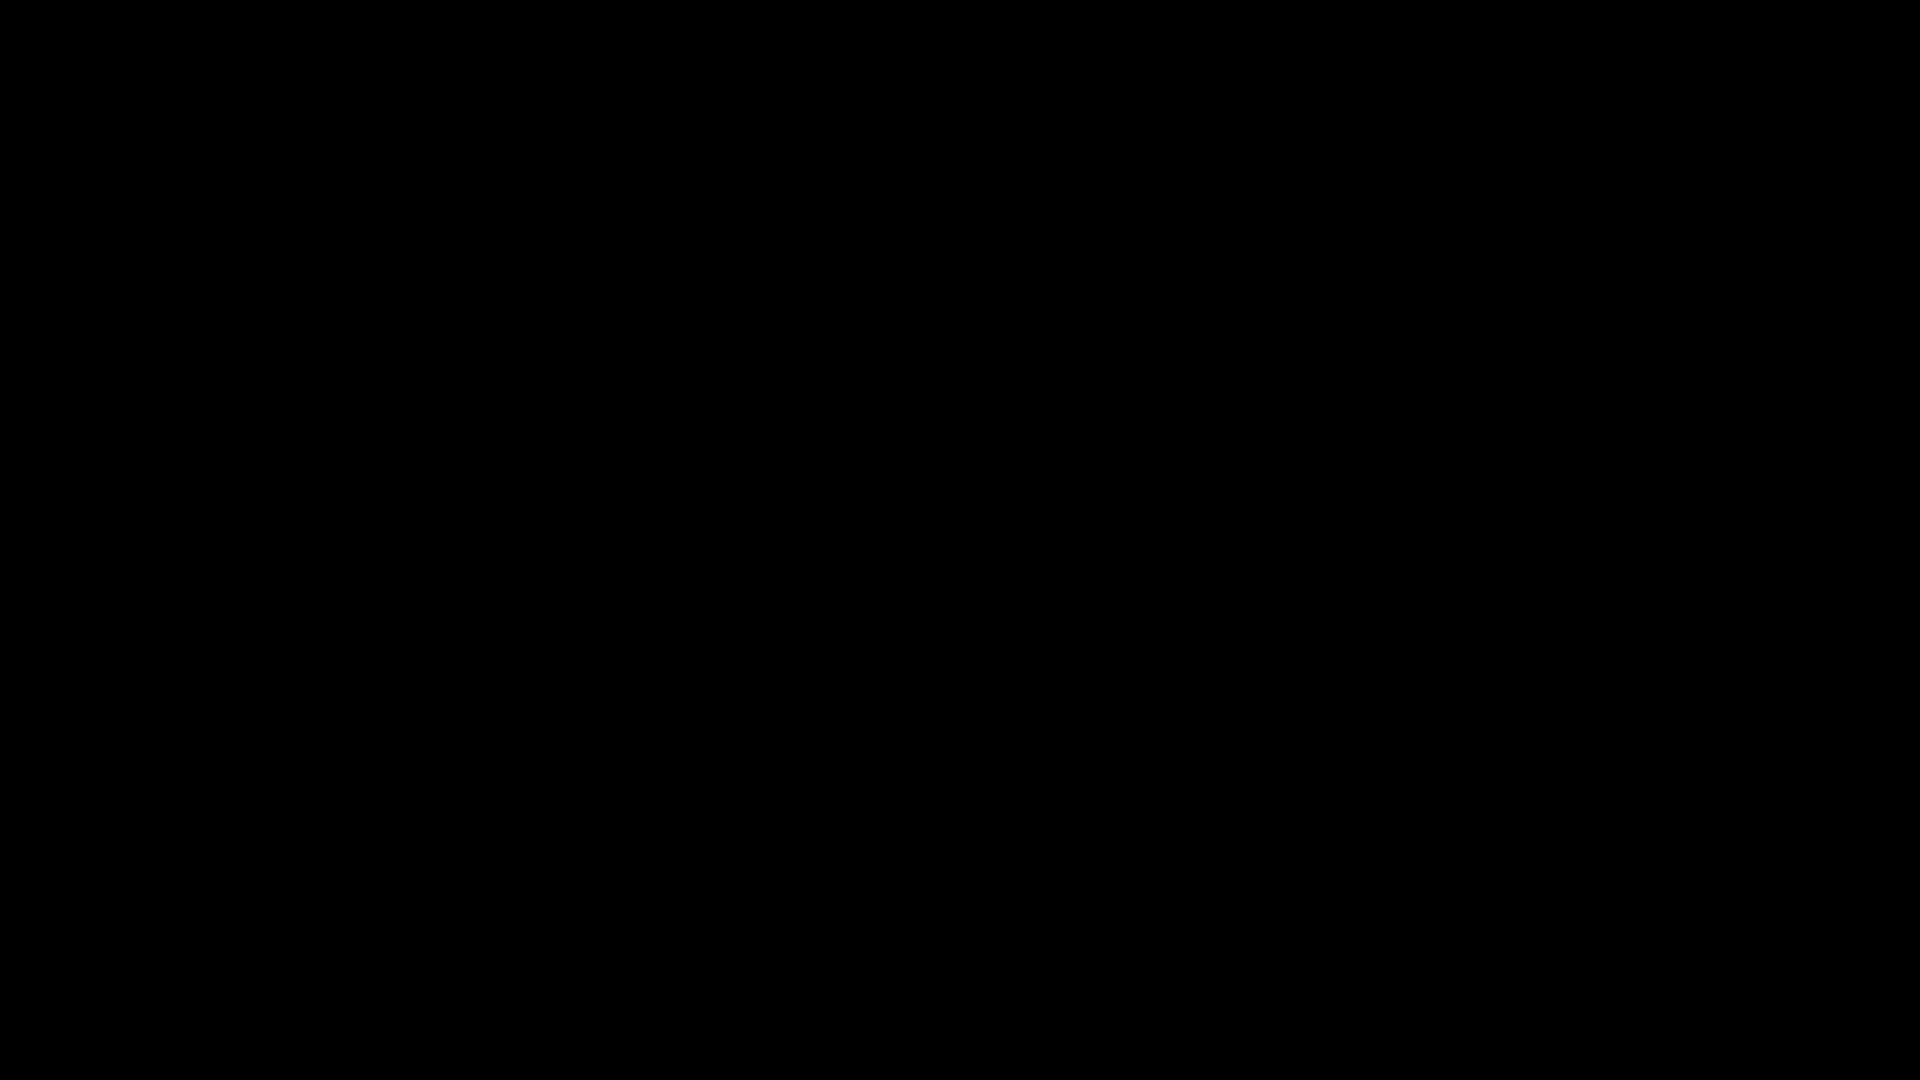
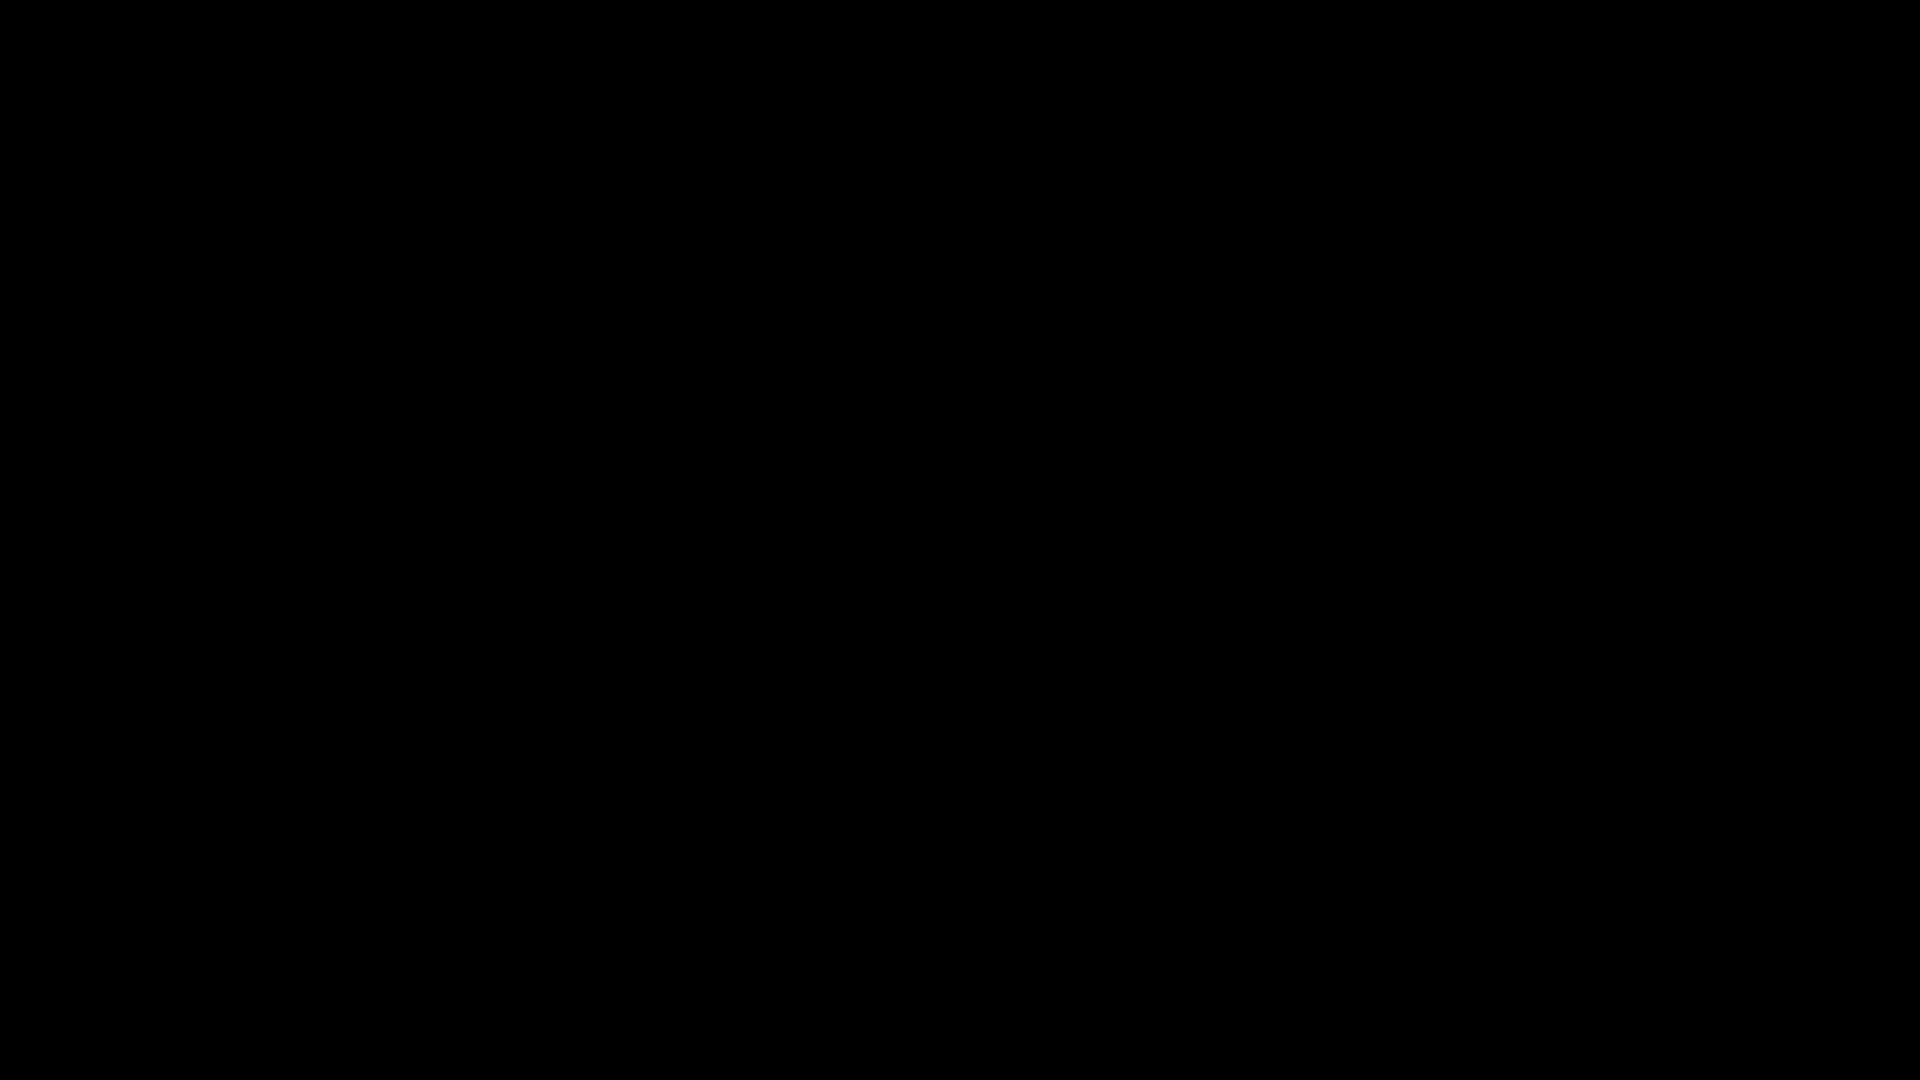
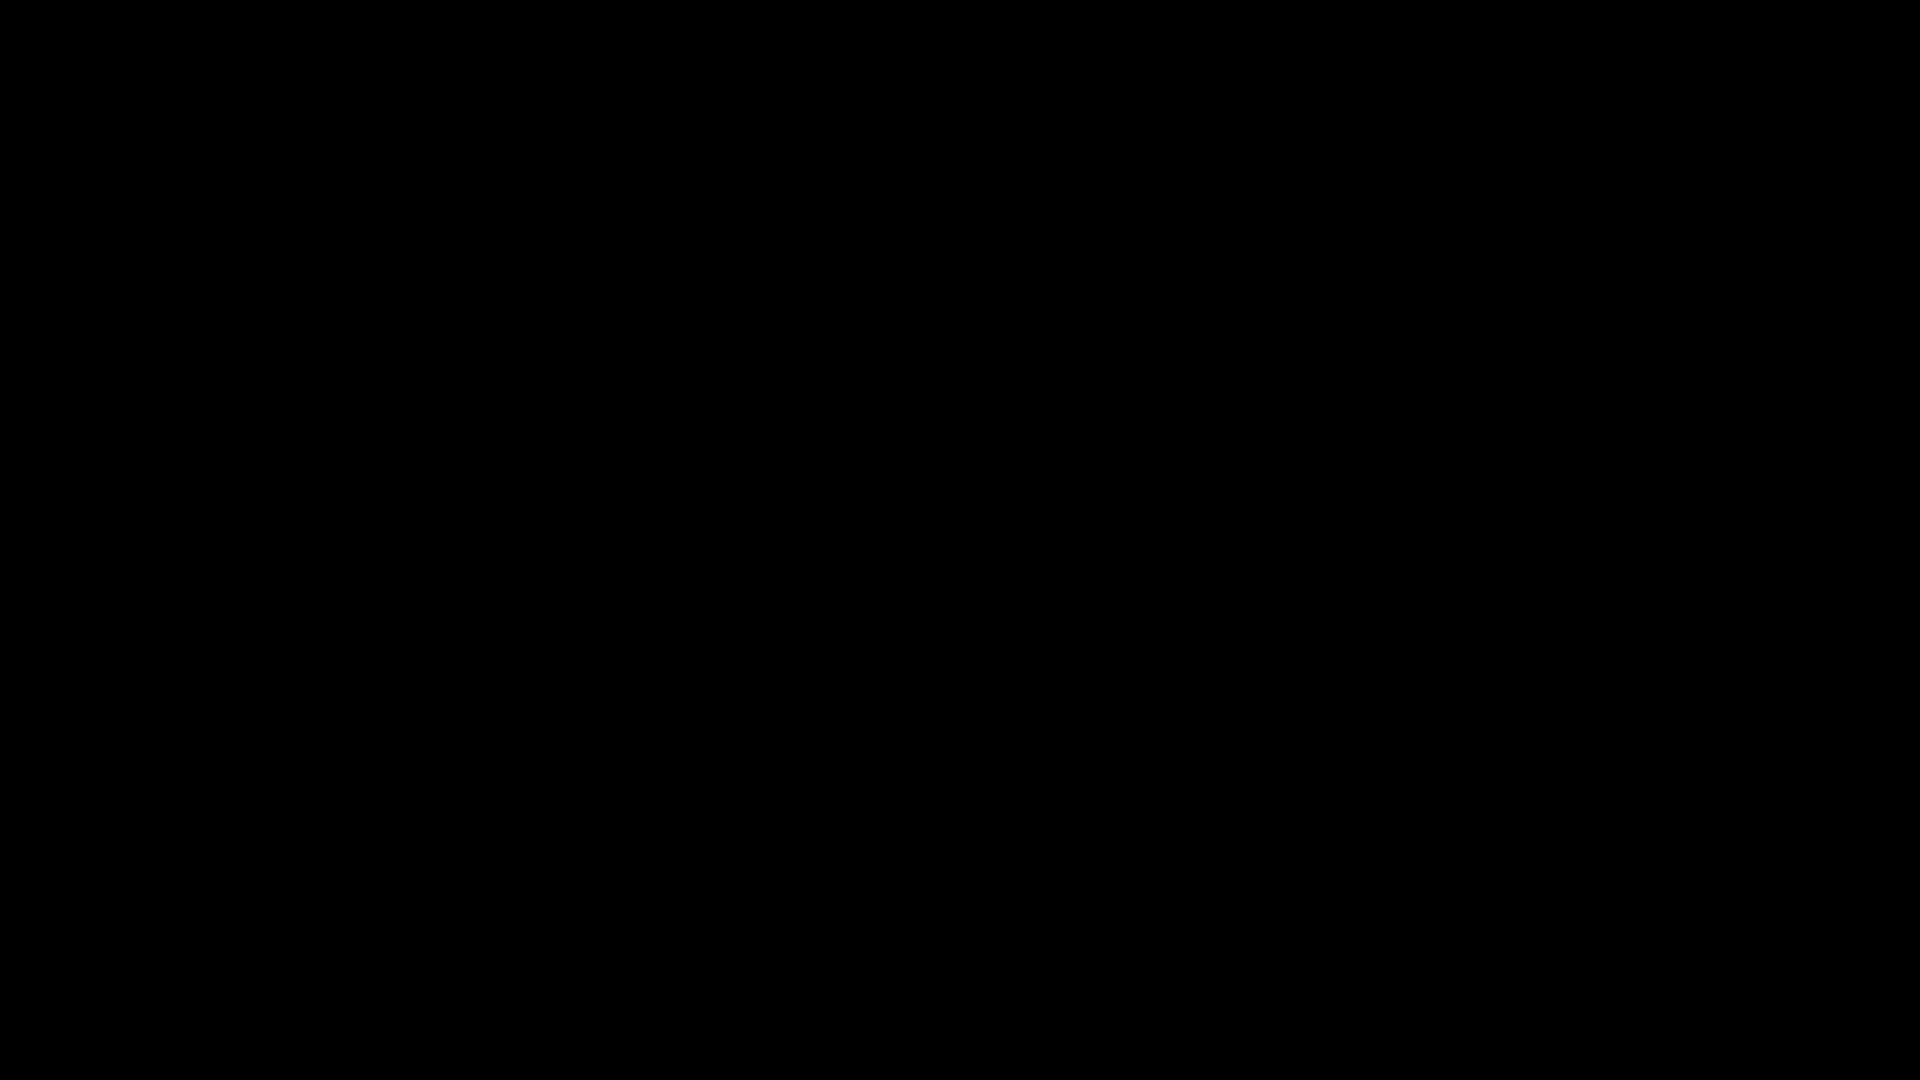

In [83]:
video_table.select(video_table.video, video_table.audio, video_table.audio_meta).show()

In [58]:
## usability needs here:
#### audio splitter for chunks that openai wont error out with (constraint is < 25MB). there's probably a way to do this with size guarantees by counting bytes
#### simple audio waveform visualization: (see diagram) https://platform.openai.com/docs/guides/text-to-speech
#### splitter for text columns (not document but text: eg, transcription output, or OCR output)

In [59]:
## we may want to add stuff that simply calls ffmpeg... which can be installed with conda, as an optional dependency for people who want to work with
# audio and video.
# its a chore to implement a lot of this with pyav and users may alreeay know how to use ffmpeg
# (eg. ffprobe)

In [ ]:
#video_table.add_embedding_index('transcription')
# option 0: create view from splitting audio into small enough chunks
# option 1: create embedding index on the transcription column directly
# option 2: create view from splitting transcription